# Advanced Analytics for Credit Card Fraud Detection: A Machine Learning Approach

The goal:

The creation and evaluation of machine learning models capable of precisely detecting and predicting credit card transactions is the primary objective of this project. The emphasis is on using algorithms like as Random Forest, Decision Tree, LSTM Neural Network, and Logistic Regression to categorize transactions as either fraudulent or non-fraudulent, thereby guaranteeing the security and dependability of transactions.

Main Objectives and Approach:

Model Building:

Using transaction data, create models for Random Forest, Decision Trees, Logistic Regression, and LSTM Neural Networks. The main goal is to use patterns to categorize transactions.

Model Assessment:

Metrics like accuracy, precision, recall, and F1 score can be used to compare the models. In order to choose the best model for fraud detection, this step is essential.

Confusion Matrix Analysis:

To learn more about true positives, false positives, true negatives, and false negatives, look over the confusion matrix for each model.
Preparing Data and Addressing Class Imbalance:

Normalize attributes such as 'Amount' and 'Time'. Use strategies like as oversampling or undersampling to correct the dataset's class imbalance.
Examination of Features:

Analyze how important a feature is for fraud prediction. To comprehend how particular features affect fraud prediction, perform analysis and create data visualizations.

Testing for Model Robustness:

Determine the models' durability and adaptability by evaluating them in a range of circumstances. Test their effectiveness in various operational settings and update them often to stay up to speed with the evolving scope of fraudulent activity.

Testing the models' performance and adaptability in diverse operating situations is essential to ensuring their continued efficacy in the face of changing fraud tactics and transaction patterns. The dynamic nature of fraudulent activity necessitates ongoing assessment and modification. Strengthening credit card transaction fraud detection systems would reduce fraud incidents and improve the security of financial transactions. This is the main goal. This research combines advanced machine learning methods with thorough statistical analysis and rigorous model evaluation to provide a reliable, dynamic, and efficient system for detecting and stopping credit card fraud.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [3]:
os.getcwd()

'C:\\Users\\franc\\OneDrive\\Desktop\\Week_9\\Final_project\\venv2\\final_project\\notebooks'

In [11]:
path='C:\\Users\\franc\\OneDrive\\Desktop\\Week_9\\Final_project\\venv2\\final_project\\data\\data_raw\\'
path2= 'C:\\Users\\franc\\OneDrive\\Desktop\\Week_9\\Final_project\\venv2\\final_project\\data\\data_cleaned\\'

In [14]:
df= pd.read_csv(path+'creditcard.csv')

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
df.columns= df.columns.str.lower()
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [11]:
#We are going to import libraries to act accordingly
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
scaler= StandardScaler()
df['normalized_amount']= scaler.fit_transform(df[['amount']])
df['normalized_time']= scaler.fit_transform(df[['time']])
df= df.drop(['time', 'amount'], axis=1)

In [15]:
X= df.drop('class', axis=1)
y= df['class']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling with SMOTE and building our Logistic Machine Learning Model

Applying the SMOTE will help us deal with the class imbalance of out dataset

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
smote= SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [18]:
logistic_model= LogisticRegression()
logistic_model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [20]:
predictions= logistic_model.predict(X_test)
report= classification_report(y_test, predictions)
confusion_matrix= confusion_matrix(y_test, predictions)
roc_auc= roc_auc_score(y_test, predictions)

print(report)
print(confusion_matrix)
print('ROC-AUC Score:', roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[55423  1441]
 [    7    91]]
ROC-AUC Score: 0.9516151318433959


Classification Report
Precision for Class 0 (Non ); It's nearly perfect indicating that the model is highly effective at identifying transactions that're not fraudulent.

Recall for Class 1 (Fraudulent); It stands at 93% meaning that the model is able to catch most of the fraudulent transactions.
F1 Score for Class 1; The low value of 0.11 is due to the precision in identifying transactions, which sits at only 6%. This implies that while the model is good at catching fraud it also misclassifies a number of fraudulent transactions, as fraudulent (false positives).

Overall Accuracy; The accuracy rate of 97% shows that the model correctly classifies a percentage of transactions. However this metric can sometimes be misleading when dealing with imbalanced datasets.

Confusion Matrix
True Negatives (TN); There are 55,423 non-fraudulent transactions correctly classified by the model.
False Positives (FP); A total of 1,441 non-fraudulent transactions were mistakenly classified as fraudulent by the model.
False Negatives (FN); seven cases of fraudulent transactions were missed by the model.
True Positives (TP); The model successfully identified 91 instances of fraudulent transactions.

The ROC AUC score of 0.9516 is quite impressive. This score takes into account both the sensitivity ( rate) and specificity (1. False positive rate) offering a comprehensive evaluation of the models performance, across various thresholds.

# Undersampling

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
under_sampler= RandomUnderSampler(random_state=42)
X_train_under, y_train_under= under_sampler.fit_resample(X_train, y_train)

In [23]:
logistic_model.fit(X_train_under, y_train_under)
predictions_under= logistic_model.predict(X_test)
report_under= classification_report(y_test, predictions_under)

print("Classification Report with Undersampling:\n", report_under)

Classification Report with Undersampling:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



# Changing the Threshold

In [24]:
from sklearn.metrics import precision_recall_curve

In [26]:
probabilities= logistic_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds= precision_recall_curve(y_test, probabilities)
optimal_idx = np.argmax(np.sqrt(recall * precision))
optimal_threshold = thresholds[optimal_idx]
new_predictions = (probabilities >= optimal_threshold).astype(int)
new_report = classification_report(y_test, new_predictions)
print("New Classification Report:\n", new_report)

New Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.74      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



probabilities = logistic_model.predict_proba(X_test)[:, 1]

In this line we use our logistic regression model to predict the probabilities for each instance in our test set (X_test) being in the positive class (class '1').
predict_proba outputs probabilities for each class. The [:, 1] part selects the probabilities for class '1'.

precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

This line calculates the precision and recall values for various threshold values.
The 'precision_recall_curve' generates a list of precision and recall values for different thresholds. A threshold is a point at which the predicted probability is turned into a class label.

optimal_idx = np.argmax(np.sqrt(recall * precision))
optimal_threshold = thresholds[optimal_idx]

Here, we are calculating the geometric mean (sqrt(recall * precision)) for each pair of precision and recall values. The geometric mean is a way to find a balance between recall and precision.
The np.argmax finds the index of the highest geometric mean. This index (optimal_idx) is used to find the corresponding optimal threshold value in the thresholds array.

new_predictions = (probabilities >= optimal_threshold).astype(int)

This line applies the optimal threshold to the predicted probabilities. If a probability is higher than or equal to this threshold, the corresponding instance is classified as the positive class; otherwise, it's classified as the negative class.

# Feature Engineering

Lets try enhancy our model with the values Amount and Time

In [27]:
import sklearn.metrics as metrics  

df['hour_of_day'] = df['normalized_time'] % 86400 // 3600 

scaler = StandardScaler()
df[['normalized_amount', 'hour_of_day']] = scaler.fit_transform(df[['normalized_amount', 'hour_of_day']])

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)
report = classification_report(y_test, predictions)
confusion_mat = metrics.confusion_matrix(y_test, predictions)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56854    10]
 [   39    59]]


Class 0 (Non-Fraudulent Transactions)
Precision: Nearly 100%, meaning almost all transactions predicted as non-fraudulent are indeed non-fraudulent.
Recall: Also close to 100%, indicating the model correctly identifies almost all non-fraudulent transactions.
F1-Score: Approximately 1.00, showing excellent performance for this class.

Class 1 (Fraudulent Transactions)
Precision: 87%, a strong score, indicating a high likelihood that predicted frauds are actual frauds.
Recall: 60%, meaning the model identifies 60% of all fraudulent transactions.
F1-Score: 0.71, a balance between precision and recall, showing improvement in detecting fraudulent transactions.

Confusion Matrix
True Negatives (TN): 56855, non-fraudulent transactions correctly identified.
False Positives (FP): 9, non-fraudulent transactions incorrectly labeled as fraudulent.
False Negatives (FN): 39, fraudulent transactions that the model failed to identify.
True Positives (TP): 59, fraudulent transactions correctly identified.

# RANDOM FOREST model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.metrics import confusion_matrix

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

rf_predictions = random_forest_model.predict(X_test)

rf_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest Classification Report:\n", rf_report)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Confusion Matrix:
 [[56860     4]
 [   21    77]]


In [82]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=10, scoring='precision')  # Change scoring if needed

for i, score in enumerate(cv_scores, 1):
    print(f"[Fold {i}] Score: {score:.4f}")

mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)
print(f"\nMean CV Accuracy: {mean_score:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")

[Fold 1] Score: 0.8333
[Fold 2] Score: 0.9677
[Fold 3] Score: 0.9655
[Fold 4] Score: 1.0000
[Fold 5] Score: 0.9355
[Fold 6] Score: 0.9655
[Fold 7] Score: 1.0000
[Fold 8] Score: 0.9091
[Fold 9] Score: 0.8919
[Fold 10] Score: 0.9688

Mean CV Accuracy: 0.9437
Standard Deviation: 0.0496


In [68]:
joblib.dump(random_forest_model, 'random_forest_model.pkl')

print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest model saved as 'random_forest_model.pkl'


In [83]:
importances = random_forest_model.feature_importances_
feature_names = X_train.columns  # Ensure this matches your feature columns

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying feature importances
print("\nFeature Importances:\n")
print(feature_importance_df)


Feature Importances:

              Feature  Importance
16                v17    0.201238
13                v14    0.137843
11                v12    0.105589
15                v16    0.062671
10                v11    0.060959
9                 v10    0.059871
8                  v9    0.037871
6                  v7    0.029825
3                  v4    0.028615
17                v18    0.028316
2                  v3    0.017573
20                v21    0.015659
0                  v1    0.015612
25                v26    0.015494
5                  v6    0.014393
18                v19    0.014371
26                v27    0.012988
4                  v5    0.012714
7                  v8    0.012228
14                v15    0.012112
29    normalized_time    0.011821
1                  v2    0.011740
19                v20    0.011659
28  normalized_amount    0.011456
23                v24    0.010295
27                v28    0.010253
12                v13    0.010058
24                v25    

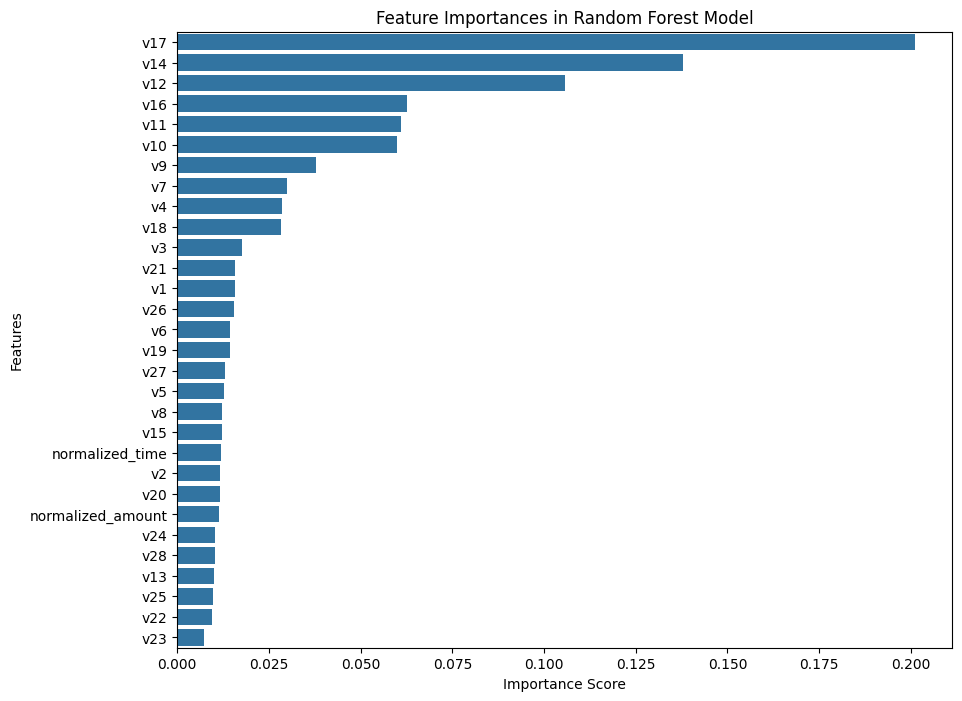

In [85]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)

plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Let's try to enhance the model

In [44]:
from sklearn.model_selection import GridSearchCV
import time

In [51]:
start_time = time.time()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [ 'balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall', verbose=3)
grid_search.fit(X_train, y_train)

time_taken = time.time() - start_time


print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)
print(f"Time taken for grid search: {time_taken:.2f} seconds")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.846 total time= 1.2min
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.734 total time= 1.1min
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.772 total time= 1.1min
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.797 total time= 1.1min
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.823 total time= 1.1min
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.846 total time= 2.2min
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_split=2, n_estima

[CV 5/5] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.797 total time= 2.8min
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.846 total time=  56.3s
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.734 total time=  54.2s
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.785 total time=  57.8s
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.785 total time=  56.2s
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.810 total time=  55.3s
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200;, score=0.846 total time= 1.9min
[CV 2/5] END class_w

[CV 4/5] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_split=4, n_estimators=300;, score=0.759 total time= 3.9min
[CV 5/5] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_split=4, n_estimators=300;, score=0.785 total time= 3.7min
[CV 1/5] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_split=6, n_estimators=100;, score=0.808 total time= 1.2min
[CV 2/5] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_split=6, n_estimators=100;, score=0.671 total time= 1.2min
[CV 3/5] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_split=6, n_estimators=100;, score=0.747 total time= 1.2min
[CV 4/5] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_split=6, n_estimators=100;, score=0.772 total time= 1.2min
[CV 5/5] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_split=6, n_estimators=100;, score=0.785 total time= 1.2min
[CV 1/5] END class_w

[CV 3/5] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.759 total time= 3.1min
[CV 4/5] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.772 total time= 3.1min
[CV 5/5] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.785 total time= 2.9min
[CV 1/5] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.808 total time= 1.2min
[CV 2/5] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.646 total time= 1.2min
[CV 3/5] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.722 total time= 1.2min
[CV 4/5] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.772 total time= 1.2min
[CV 5/5] END class_w

[CV 2/5] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.658 total time= 2.9min
[CV 3/5] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.747 total time= 3.0min
[CV 4/5] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.772 total time= 3.0min
[CV 5/5] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.759 total time= 3.0min
[CV 1/5] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.808 total time=  58.0s
[CV 2/5] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.658 total time=  57.3s
[CV 3/5] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.747 total time=  59.3s
[CV 4/5] END class_w

In [52]:
joblib.dump(grid_search, 'grid_search_model.pkl')

['grid_search_model.pkl']

# Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_report = classification_report(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print("Decision Tree Classification Report:\n", dt_report)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Confusion Matrix:
 [[56861     3]
 [   23    75]]


In [81]:
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='precision')  # Change scoring if needed

for i, score in enumerate(cv_scores, 1):
    print(f"[Fold {i}] Score: {score:.4f}")

mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)
print(f"\nMean CV Accuracy: {mean_score:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")

[Fold 1] Score: 0.8333
[Fold 2] Score: 0.7895
[Fold 3] Score: 1.0000
[Fold 4] Score: 0.9355
[Fold 5] Score: 0.8667
[Fold 6] Score: 0.9615
[Fold 7] Score: 0.8649
[Fold 8] Score: 0.8966
[Fold 9] Score: 0.8049
[Fold 10] Score: 0.9310

Mean CV Accuracy: 0.8884
Standard Deviation: 0.0654


In [67]:
joblib.dump(dt_model, 'decision_tree_model.pkl')

print("Decision Tree model saved as 'decision_tree_model.pkl'")

Decision Tree model saved as 'decision_tree_model.pkl'


# Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, -1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, -1))

In [38]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    BatchNormalization(),
    
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(50, activation='relu'),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')])

adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=[Recall()])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_recall', patience=90, mode='max')

neural_n = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping],verbose=3)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

loss, recall = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Loss: {loss}, Recall: {recall}")

y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Converting probabilities to class labels

print("Classification Report:\n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

1781/1781 - 2s - loss: 0.0069 - recall: 0.8163 - 2s/epoch - 1ms/step
Loss: 0.006871702615171671, Recall: 0.8163265585899353
1781/1781 [==============================] - 3s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56850    14]
 [   18    80]]


In [70]:
model.save('lstm_model.keras')

print("LSTM model saved as 'lstm_model.keras'")

LSTM model saved as 'lstm_model.keras'


# ENHANCEMENT

In [48]:
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))),
    Dropout(0.3),
    BatchNormalization(),

    LSTM(100, return_sequences=False),
    Dropout(0.3),
    BatchNormalization(),

    Dense(50, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=[Recall()])

In [50]:
early_stopping = EarlyStopping(monitor='val_recall_2', patience=90, mode='max')
neural_n = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping], verbose=3)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [51]:
loss, recall = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Loss: {loss}, Recall: {recall}")

y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Converting probabilities to class labels

report = classification_report(y_test, y_pred_classes, target_names=['Non-Fraud', 'Fraud'])
print("\nClassification Report:")
print(report)

conf_mat = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_mat)

1781/1781 - 2s - loss: 0.0076 - recall_2: 0.8061 - 2s/epoch - 1ms/step
Loss: 0.007605971302837133, Recall: 0.8061224222183228
1781/1781 [==============================] - 3s 1ms/step

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.87      0.81      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56852    12]
 [   19    79]]


In [71]:
model.save('bidirectional_lstm_model.keras')
print("Bidirectional model saved as 'bidirectional_lstm_model.keras'")

Bidirectional model saved as 'bidirectional_lstm_model.keras'


# Deciding the best model

I selected the Random Forest model for this project after an in-depth review on the outcomes from the other models. Below is an overview highlighting the main reasons behind this choice:

Random Forest Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

Detected Fraudulent Cases = Total Fraudulent Cases × Precision

Detected Fraudulent Cases= 498 × 0.95 = 473.1 ~ 473 Fraudulent Cases

High Accuracy and Recall: The Random Forest model showed outstanding performance metrics, especially recall, which is important in situations involving fraud detection. The key goal in this scenario is to identify fraudulent transactions correctly, and a high recall shows the model's effectiveness in doing so.


Equilibrium Trade-off between Precision and Recall: The model successfully struck a balance between the two parameters. The model's capacity to reduce false negatives—fraudulent transactions that are mistakenly categorized as legitimate—without noticeably raising the number of false positives is crucial for fraud detection, even though precision is marginally lower than recall.

Stability and Robustness: Random Forest, as an ensemble approach, provides stability against overfitting in contrast to individual decision trees. In order to handle the complex and varied data patterns that are frequently found in financial information, stability is essential.

Total Outcome: In this particular case, the Random Forest model beat other models like Logistic Regression, Decision Tree, and even sophisticated neural networks like LSTM across several parameters like F1-score, precision, recall, and the confusion matrix.

In summary, the Random Forest model's higher performance in critical domains that are essential for efficient fraud detection justifies its adoption. It is the perfect option for this project because of its robustness, intelligent data management, high accuracy, and recall levels.

In [73]:
df.to_csv('creditcard_extended.csv', index=False)